In [1]:
import pandas as pd
import time

In [2]:
start_time = time.time()
d1 = pd.read_csv('C:/Users/research_01/pytorch/A_Project_1/by_date/data/이용정보/서울특별시 공공자전거 이용정보(시간대별)_2301-2306.csv')
d2 = pd.read_csv('C:/Users/research_01/pytorch/A_Project_1/by_date/data/이용정보/서울특별시 공공자전거 이용정보(시간대별)_2307-2312.csv')
d3 = pd.read_csv('C:/Users/research_01/pytorch/A_Project_1/by_date/data/이용정보/서울특별시 공공자전거 이용정보(시간대별)_2401-2405.csv')
tmp_data = pd.concat([d1, d2, d3], ignore_index=True)
print(round((time.time() - start_time)/60, 2))

C:\Users\research_01\AppData\Local\Temp\61\ipykernel_26772\1267394010.py:3: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  d2 = pd.read_csv('C:/Users/research_01/pytorch/A_Project_1/by_date/data/이용정보/서울특별시 공공자전거 이용정보(시간대별)_2307-2312.csv')


2.6


In [3]:
data = tmp_data.copy()
data.rename(columns = {'이용시간(분)' : '이용시간'}, inplace = True)
data.rename(columns = {'이동거리(M)' : '이동거리'}, inplace = True)
data = data[data.이용시간 != 0]
data = data[data.이동거리 != 0]
data = data.dropna(axis=0)
print(len(tmp_data), len(data))

55032314 37904172


In [4]:
tmp = data['대여일자'].unique()
date_list = []
weekday_to_date = {}
for i in range(len(tmp)):
    date_list.append(int(tmp[i].replace('-','')))
    if i%7 not in weekday_to_date:
        weekday_to_date[i%7] = []
    weekday_to_date[i%7].append(tmp[i])
print(len(date_list))

517


In [5]:
date_to_weekday = dict()
for weekday, dates in weekday_to_date.items():
    for date in dates:
        date_to_weekday[date] = weekday
data['요일'] = data['대여일자'].map(date_to_weekday)

In [6]:
ph_day_list = ['2023-01-01','2023-01-21','2023-01-22','2023-01-23','2023-01-24','2023-03-01','2023-05-05',
                '2023-05-27','2023-05-29','2023-06-06','2023-08-15','2023-09-28','2023-09-29','2023-09-30',
                '2023-10-02','2023-10-03','2023-10-09','2023-12-25','2024-01-01','2024-02-09','2024-02-10',
                '2024-02-11','2024-02-12','2024-03-01','2024-04-10','2024-05-05','2024-05-06','2024-05-15']

date_to_phday = dict()
for weekday, dates in weekday_to_date.items():
    if weekday == 0 or weekday == 6:
        for date in dates:
            date_to_phday[date] = 0
    else:
        for date in dates:
            if date in ph_day_list:
                date_to_phday[date] = 0
            else:
                date_to_phday[date] = 1
                
phday_to_date = dict()
for date, phday in date_to_phday.items():
    if phday not in phday_to_date:
        phday_to_date[phday] = []
    phday_to_date[phday].append(date)
    
data['공휴일'] = data['대여일자'].map(date_to_phday)

In [7]:
tmp = data.groupby(['공휴일'])['이동거리'].apply(list).to_dict()

In [8]:
cnt = 0
for key in tmp.keys():
    print(key)
    print("{0:10.2f} / {1:10.2f} / {2:10.2f}".format(max(tmp[key]), round(sum(tmp[key]) / len(tmp[key]), 2), min(tmp[key])))
    cnt += len(tmp[key])
    print('-'*40)
print(cnt, len(data))

0
 307412.44 /    3100.91 /       0.10
----------------------------------------
1
 693418.03 /    2618.39 /       0.10
----------------------------------------
37904172 37904172


In [9]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)
import numpy as np

index = np.arange(2)
labels = ['phday', 'nday']

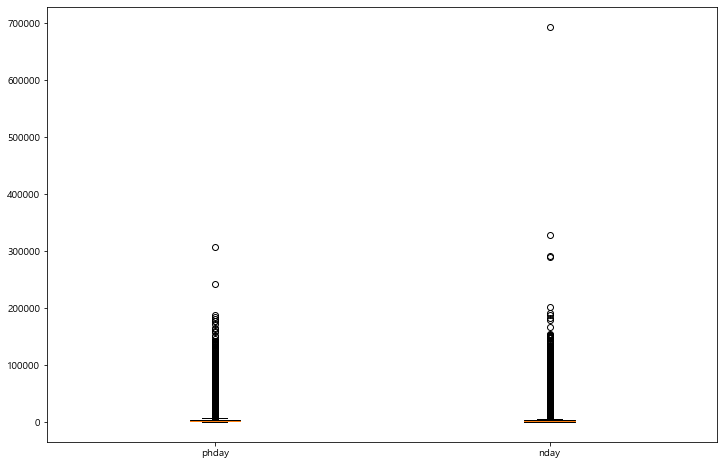

In [10]:
plt.figure(figsize=(12,8))
plt.boxplot([tmp[0], tmp[1]])
plt.xticks([1, 2],labels)
plt.show()

<Figure size 864x576 with 0 Axes>

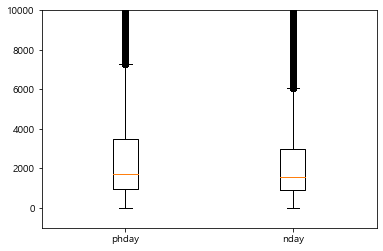

In [11]:
plt.figure(figsize=(12,8))
#plt.boxplot([tmp[0], tmp[1], tmp[2], tmp[3], tmp[4], tmp[5], tmp[6]])
fig, ax = plt.subplots()
#box = ax.boxplot([tmp[0], tmp[1], tmp[2], tmp[3], tmp[4], tmp[5], tmp[6]], notch=True, whis=1.5)
box = ax.boxplot([tmp[0], tmp[1]])

plt.xticks([1, 2],labels)
plt.ylim(-1000, 10000)
whiskers = [item.get_ydata() for item in box['whiskers']]
medians = [item.get_ydata() for item in box['medians']]
fliers = [item.get_ydata() for item in box['fliers']]
plt.show()

In [12]:
whiskers

[array([9.7788e+02, 1.0000e-01]),
 array([3500.  , 7283.18]),
 array([9.1074e+02, 1.0000e-01]),
 array([2980.  , 6083.89])]

In [13]:
medians

[array([1746., 1746.]), array([1590., 1590.])]

In [14]:
for i in range(2):
    print(len(fliers[i]), len(tmp[i]), len(fliers[i])/len(tmp[i]))

999050 10219703 0.09775724402167069
2471843 27684469 0.08928627094129925
